<a href="https://colab.research.google.com/github/gorantlasuhas/git_new/blob/main/ml_lab_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Load the dataset from the provided URL
url = "https://www.kaggle.com/datasets/nelgiriyewithana/billionaires-statistics-dataset/"

df = pd.read_csv('/content/billionaires_dataset.csv')

print(df.columns)




Index(['rank', 'finalWorth', 'category', 'personName', 'age', 'country',
       'city', 'source', 'industries', 'countryOfCitizenship', 'organization',
       'selfMade', 'status', 'gender', 'birthDate', 'lastName', 'firstName',
       'title', 'date', 'state', 'residenceStateRegion', 'birthYear',
       'birthMonth', 'birthDay', 'cpi_country', 'cpi_change_country',
       'gdp_country', 'gross_tertiary_education_enrollment',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'tax_revenue_country_country', 'total_tax_rate_country',
       'population_country', 'latitude_country', 'longitude_country'],
      dtype='object')


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null   object 
 9   countryOfCitizenship                        2640 non-null   object 
 10  organization

In [25]:
df.describe()

,rank,finalWorth,age,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
count,2640.000000,2640.000000,2575.000000,2564.000000,2564.000000,2564.000000,2456.000000,2456.000000,2458.000000,2459.000000,2458.000000,2457.000000,2458.000000,2.476000e+03,2476.000000,2476.000000
mean,1289.159091,4623.787879,65.140194,1957.183307,5.740250,12.099844,127.755204,4.364169,67.225671,102.858520,78.122823,12.546235,43.963344,5.102053e+08,34.903592,12.583156
std,739.693726,9834.240939,13.258098,13.282516,3.710085,9.918876,26.452951,3.623763,21.343426,4.710977,3.730099,5.368625,12.145296,5.542447e+08,17.003497,86.762989
min,1.000000,1000.000000,18.000000,1921.000000,1.000000,1.000000,99.550000,-1.900000,4.000000,84.700000,54.300000,0.100000,9.900000,3.801900e+04,-40.900557,-106.346771
25%,659.000000,1500.000000,56.000000,1948.000000,2.000000,1.000000,117.240000,1.700000,50.600000,100.200000,77.000000,9.600000,36.600000,6.683440e+07,35.861660,-95.712891
50%,1312.000000,2300.000000,65.000000,1957.000000,6.000000,11.000000,117.240000,2.900000,65.600000,101.800000,78.500000,9.600000,41.200000,3.282395e+08,37.090240,10.451526
75%,1905.000000,4200.000000,75.000000,1966.000000,9.000000,21.000000,125.080000,7.500000,88.200000,102.600000,80.900000,12.800000,59.100000,1.366418e+09,40.463667,104.195397
max,2540.000000,211000.000000,101.000000,2004.000000,12.000000,31.000000,288.570000,53.500000,136.600000,142.100000,84.200000,37.200000,106.300000,1.397715e+09,61.924110,174.885971


In [26]:
df = df.drop(['city'], axis=1)

# Create a binary class label 'US' and 'Non_US' based on the 'country' column
df['Class'] = np.where(df['country'] == 'United States', 'US', 'Non_US')

# Encode the class labels to numerical values
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

# Convert non-numeric columns to unique numerical identifiers
non_numeric_columns = ['category', 'personName', 'country', 'source', 'industries', 'countryOfCitizenship', 'organization', 'status', 'gender', 'birthDate', 'lastName', 'firstName', 'title', 'date', 'state', 'residenceStateRegion']
for column in non_numeric_columns:
    df[column] = le.fit_transform(df[column])

# Feature Engineering:
# Let's create new features based on existing ones. You can add more engineering as needed.
df['birthYearMonth'] = df['birthYear'] * 12 + df['birthMonth']

# Remove the dollar symbol and normalize the 'gdp_country' column
df['gdp_country'] = df['gdp_country'].str.replace('$', '').str.replace(',', '').astype(float) / 1e12  # Convert to trillions

# Handle missing values by replacing NaN with the mean of each feature
df.fillna(df.mean(), inplace=True)

# Split the data into features (X) and the target (y)
X = df.drop(['country', 'Class'], axis=1)
y = df['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict the class labels on the test data
y_pred = model.predict(X_test)

# Print classification report
report = classification_report(y_test, y_pred, target_names=['Non_US', 'US'])
print(report)

# Rank features based on Odds Ratio
odds_ratio = np.exp(model.coef_).ravel()
odds_ranking = np.argsort(odds_ratio)[::-1]

# Rank features based on Mutual Information
mi = mutual_info_classif(X, y)
mi_ranking = np.argsort(mi)[::-1]



<ipython-input-26-b047c7d2d21d>:20: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['gdp_country'] = df['gdp_country'].str.replace('$', '').str.replace(',', '').astype(float) / 1e12  # Convert to trillions
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/

              precision    recall  f1-score   support

      Non_US       0.74      1.00      0.85       389
          US       0.00      0.00      0.00       139

    accuracy                           0.74       528
   macro avg       0.37      0.50      0.42       528
weighted avg       0.54      0.74      0.63       528



In [27]:
# Print the Odds Ratio and Mutual Information for each feature
print("Odds Ratio and Mutual Information for Each Feature:")
for i in range(len(X.columns)):
    print(f"Feature: {X.columns[i]}")
    print(f"Odds Ratio: {odds_ratio[i]}")
    print(f"Mutual Information: {mi[i]}\n")

Odds Ratio and Mutual Information for Each Feature:
Feature: rank
Odds Ratio: 0.9999981770028732
Mutual Information: 0.027932531692873352

Feature: finalWorth
Odds Ratio: 1.0000025769620713
Mutual Information: 0.013024363911955383

Feature: category
Odds Ratio: 0.9999999970951166
Mutual Information: 0.08588666242145582

Feature: personName
Odds Ratio: 0.9999987297307231
Mutual Information: 0.14797101506190935

Feature: age
Odds Ratio: 0.9999999493043323
Mutual Information: 0.0259788994713106

Feature: source
Odds Ratio: 0.9999996770857881
Mutual Information: 0.17521296563917121

Feature: industries
Odds Ratio: 0.9999999970951166
Mutual Information: 0.08336115974109504

Feature: countryOfCitizenship
Odds Ratio: 1.0000000646478393
Mutual Information: 0.4946551509322552

Feature: organization
Odds Ratio: 0.9999996450913201
Mutual Information: 0.06311170430096835

Feature: selfMade
Odds Ratio: 0.9999999997978576
Mutual Information: 0.0

Feature: status
Odds Ratio: 0.9999999983533779
Mutual

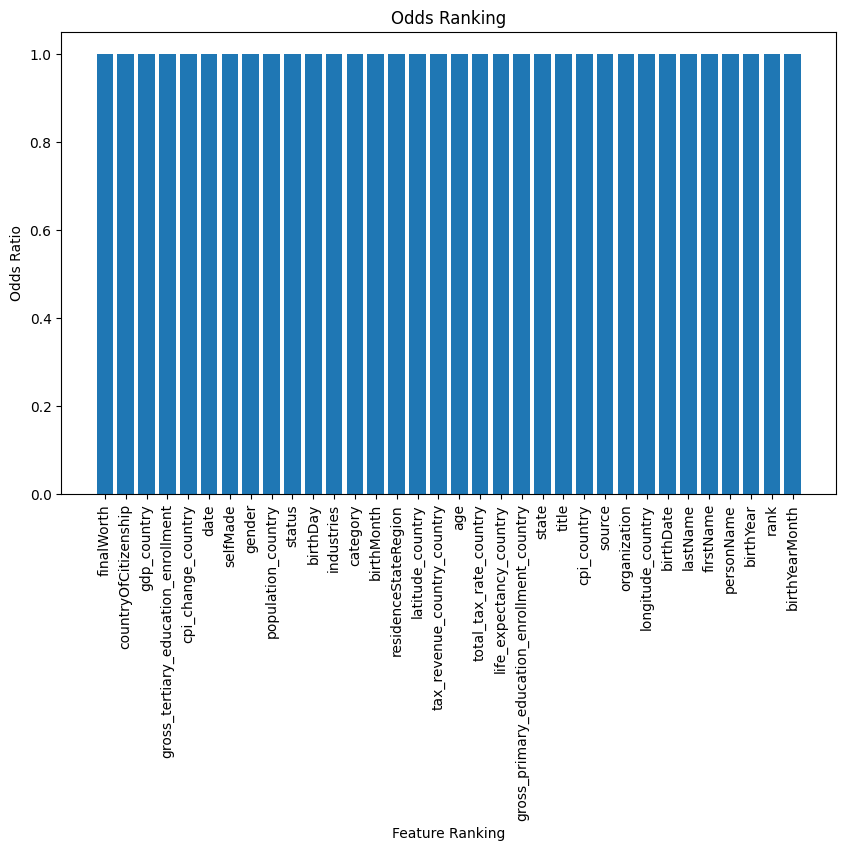

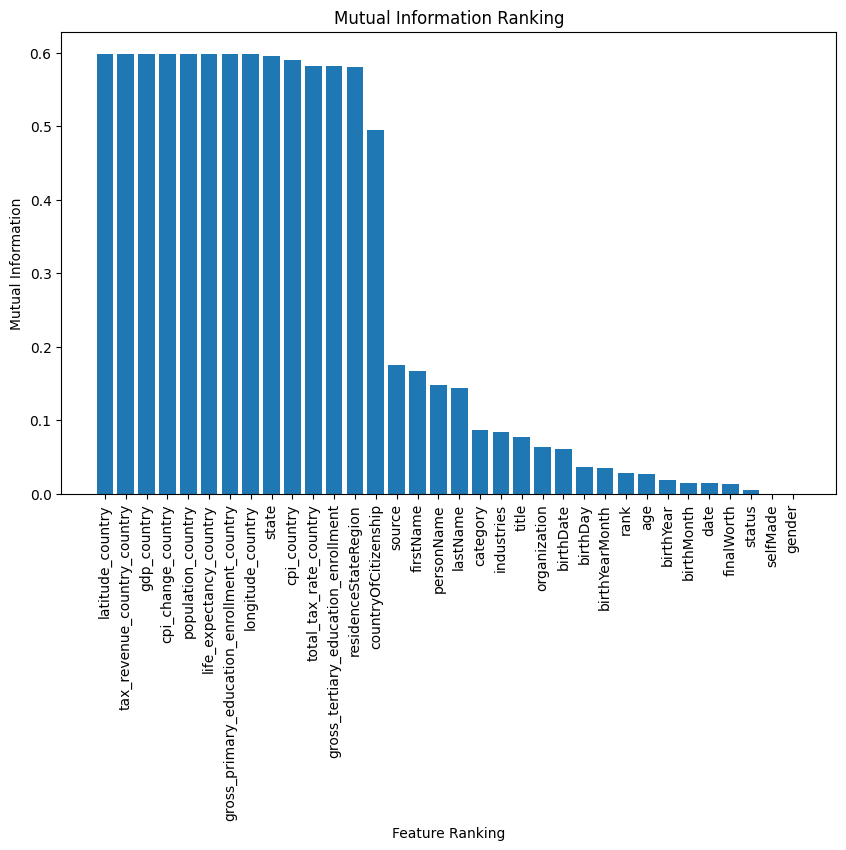

In [28]:
import matplotlib.pyplot as plt

# Plot the feature rankings using a bar graph for Odds Ranking
plt.figure(figsize=(10, 6))
plt.bar(range(len(odds_ranking)), odds_ratio[odds_ranking], align="center")
plt.xlabel("Feature Ranking")
plt.ylabel("Odds Ratio")
plt.title("Odds Ranking")
plt.xticks(range(len(odds_ranking)), [X.columns[i] for i in odds_ranking], rotation=90)
plt.show()

# Plot the feature rankings using a bar graph for Mutual Information Ranking
plt.figure(figsize=(10, 6))
plt.bar(range(len(mi_ranking)), mi[mi_ranking], align="center")
plt.xlabel("Feature Ranking")
plt.ylabel("Mutual Information")
plt.title("Mutual Information Ranking")
plt.xticks(range(len(mi_ranking)), [X.columns[i] for i in mi_ranking], rotation=90)
plt.show()

In [29]:
# Print the feature rankings
print("\nFeature Ranking based on Odds Ratio:")
for i, feature_index in enumerate(odds_ranking):
    print(f"{i + 1}. {X.columns[feature_index]}")

print("\nFeature Ranking based on Mutual Information:")
for i, feature_index in enumerate(mi_ranking):
    print(f"{i + 1}. {X.columns[feature_index]}")


Feature Ranking based on Odds Ratio:
1. finalWorth
2. countryOfCitizenship
3. gdp_country
4. gross_tertiary_education_enrollment
5. cpi_change_country
6. date
7. selfMade
8. gender
9. population_country
10. status
11. birthDay
12. industries
13. category
14. birthMonth
15. residenceStateRegion
16. latitude_country
17. tax_revenue_country_country
18. age
19. total_tax_rate_country
20. life_expectancy_country
21. gross_primary_education_enrollment_country
22. state
23. title
24. cpi_country
25. source
26. organization
27. longitude_country
28. birthDate
29. lastName
30. firstName
31. personName
32. birthYear
33. rank
34. birthYearMonth

Feature Ranking based on Mutual Information:
1. latitude_country
2. tax_revenue_country_country
3. gdp_country
4. cpi_change_country
5. population_country
6. life_expectancy_country
7. gross_primary_education_enrollment_country
8. longitude_country
9. state
10. cpi_country
11. total_tax_rate_country
12. gross_tertiary_education_enrollment
13. residenceSt